In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import japanize_matplotlib
import math

# KLダイバージェンス
2つの確率分布の誤差を表す。

## KLダイバージェンスの性質
- 非対称性を持ち、PとQの値を入れ替えると別の値が計算される
- 必ず0以上の値になる

$$
D_{KL}(P \parallel Q) = \sum_i P(x) \frac{P(i)}{Q(i)}
$$

## 例１）以下の確率分布pとqのKLダイバージェンスを計算せよ
| x   | p(x) | q(x) |
|-----|------|------|
| A   | 0.4  | 0.35 |
| B   | 0.3  | 0.25 |
| C   | 0.2  | 0.30 |
| D   | 0.1  | 0.10 |

In [36]:
p = np.array([0.4, 0.3, 0.2, 0.1])
q = np.array([0.35, 0.25, 0.3, 0.1])

kl = sum(p * np.log(p / q))
print(kl)

0.027016002466362626


### 例２）魚のガチャガチャがある。ガチャガチャにはクジラ、イルカのどちらかのおもちゃの一つが入ったカプセルが100個ある。真のガチャガチャの分布は50%の確率でクジラが出るようになっている$p_x(μ=0.5)。$生成AIが近似した分布$q_x(μ=0.2)$は真の分布をどれくらい近似できているか、KLダイバージェンスを使って求めよ

二項分布の確率質量関数

$$
P(x) = nCx p^x(1 - p)^{n - x}
$$

In [77]:
# μより大きい乱数であれば1、そうでないなら2を返す要素をn個生成し、numpy配列として返す
def binomial(n, μ):
    return np.array([1 if random.uniform(0.0, 1.0) >= μ else 2 for _ in range(n)])

In [61]:
def KLDivergence(p, q):
    return sum(p * np.log(p / q))

In [78]:
data_num = 100
μ = 0.5 # 真のクジラが出る確率
μ_hat = 0.2 # 近似した分布におけるクジラが出る確率

p = binomial(data_num, μ)
q = binomial(data_num, μ_hat)

p_num_whales = len(np.where(p == 1)[0])
p_num_dolphins = data_num - p_num_whales

q_num_whales = len(np.where(q == 1)[0])
q_num_dolphins = data_num - q_num_whales

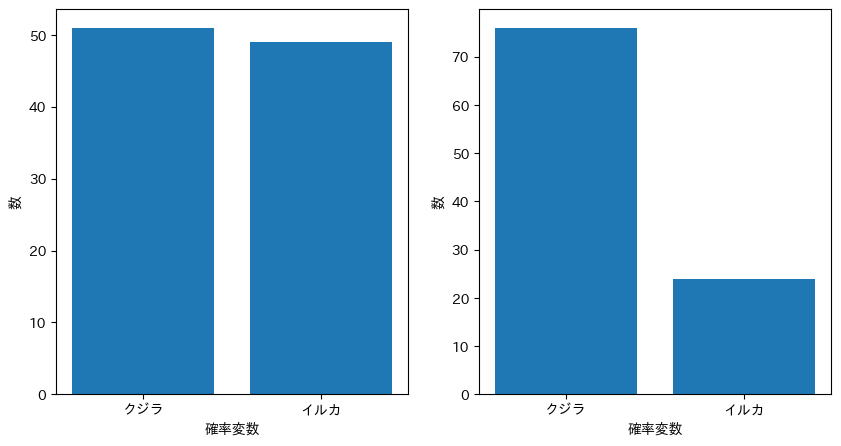

[51, 49]

In [79]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

types = ["クジラ", "イルカ"]
ax1.bar(types, [p_num_whales, p_num_dolphins])
ax2.bar(types, [q_num_whales, q_num_dolphins])

ax1.set_xlabel("確率変数")
ax1.set_ylabel("数")
ax2.set_xlabel("確率変数")
ax2.set_ylabel("数")

plt.show()
[p_num_whales, p_num_dolphins]

In [80]:
kl = KLDivergence(p, q)
print(f"KLダイバージェンスは：{kl}")

KLダイバージェンスは：42.281978014156635
